# Introduction à l'ANOVA et l'Analyse de sensibilité

## Objectif
Ce notebook vise à illustrer la mise en oeuvre de l'ANOVA et de l'Analyse de sensibilité avec OpenTURNS.

Il présente aussi les données d'un cas test de signature EM de corps sur lequel on peut tester différents métamodèles.

## Import modules et data

In [1]:
import pandas as pd

In [2]:
import numpy as np

On commence par charger les données qui sont dans un fichier .csv avec comme séparateur un ;
Les données d'entrée sont déjà normalisées

To read files from google colab

url_name='https://raw.githubusercontent.com/dbetteb/early-ML/master/08_CAS_TEST_SER/data_scaled.csv'

xy_tot = pd.read_csv(url_name, header=0,sep=';')

In [3]:
url_name='https://raw.githubusercontent.com/dbetteb/early-ML/master/08_CAS_TEST_SER/data_scaled.csv'
xy_tot = pd.read_csv(url_name, header=0,sep=';')

Sinon en local

In [ ]:
file_name="data_scaled.csv"
xy_tot=pd.read_csv(file_name,header=0,sep=';')
xy_tot.describe()

Visualisation

In [5]:
print(xy_tot)

       Logive      Rnez    Lfente  ...     Corde         H         y
0    0.495338  0.000000  0.497895  ...  0.500010  0.504185  1.026548
1    0.839713  0.797224  0.544219  ...  0.062737  0.516893  0.982029
2    0.718764  0.462412  0.122786  ...  0.823282  0.887550  0.928365
3    0.232614  0.964583  0.208857  ...  0.397045  0.031743 -0.995189
4    0.328525  0.360263  0.771815  ...  0.160963  0.593623  1.025108
..        ...       ...       ...  ...       ...       ...       ...
106  0.893357  0.616894  0.666424  ...  0.521913  0.072636  0.316804
107  0.954314  0.544326  0.619205  ...  0.927965  0.388065 -0.399315
108  0.673615  0.753639  0.953679  ...  0.288987  0.342212 -0.708425
109  0.655463  0.940585  0.931341  ...  0.711866  0.261593 -0.297182
110  0.018758  0.603489  0.405507  ...  0.674970  0.733691  1.508639

[111 rows x 12 columns]


Pour voir le format des données

In [6]:
xy_tot.shape

(111, 12)

## ANOVA

In [7]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [8]:
results = ols('y ~ Logive+Rnez+Lfente+Pfente+Dengin+LBB+Pos+Fleche_BA+Fleche_BF+Corde+H', data=xy_tot).fit()

In [9]:
aov_table = sm.stats.anova_lm(results, typ=2)
aov_table

,sum_sq,df,F,PR(>F)
Logive,3.764760,1.0,63.855565,2.509619e-12
Rnez,0.060988,1.0,1.034434,3.115987e-01
Lfente,0.020915,1.0,0.354749,5.527961e-01
Pfente,0.009864,1.0,0.167303,6.834035e-01
Dengin,0.485694,1.0,8.238044,5.016189e-03
LBB,51.942016,1.0,881.008801,4.402781e-51
Pos,0.669155,1.0,11.349801,1.076363e-03
Fleche_BA,6.925141,1.0,117.460019,1.640449e-18
Fleche_BF,0.772318,1.0,13.099585,4.674633e-04
Corde,10.236574,1.0,173.626527,1.666877e-23


## Métamodèles

**Modèle de type régression linéaire**

On sépare input et sortie y

In [10]:
y_tot= xy_tot.pop('y')

In [11]:
y_tot.shape

(111,)

In [12]:
xy_tot.shape

(111, 11)

In [13]:
import sklearn.linear_model as lm
linreg = lm.LinearRegression()

In [14]:
lr=linreg.fit(xy_tot, y_tot)

In [15]:
lr.coef_

array([ 0.63524533,  0.0801131 ,  0.0473146 , -0.03260559, -0.22678993,
        2.36752092, -0.26686172, -0.8631107 ,  0.28595473,  1.0495401 ,
        1.7477699 ])

In [16]:
linreg.score(xy_tot,y_tot)

0.9469383113421452

Tracés

In [17]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


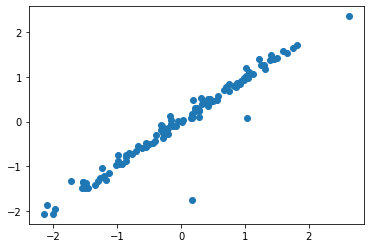

In [18]:
plt.plot(y_tot,lr.predict(xy_tot),'o')

**Modèle de type MLP SKLEARN**

On sépare les données entre apprentissage et test (20%)

In [20]:
from sklearn.model_selection import train_test_split


In [21]:
x_train, x_test, y_train, y_test = train_test_split(xy_tot, y_tot, test_size=0.1)

In [22]:
from sklearn.neural_network import MLPRegressor

In [23]:
nnet=MLPRegressor(hidden_layer_sizes=(10,),max_iter=10000,activation='tanh',alpha=0.05,solver='lbfgs')

In [24]:
nnet.fit(x_train,y_train)

MLPRegressor(activation='tanh', alpha=0.05, hidden_layer_sizes=(10,),
             max_iter=10000, solver='lbfgs')

In [25]:
y_pred=nnet.predict(x_test)

In [26]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


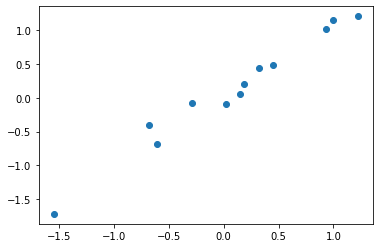

In [27]:
plt.plot(y_test, y_pred,'o')

Calcul du coefficient de détermination R2

In [28]:
from sklearn.metrics import r2_score

In [29]:
r2_score(y_test,y_pred)

0.966907298720788

**Exercice 2** : Tester d'autres métamodèles

## Analyse de sensibilité

Nous allons utiliser OpenTURNS et les 3 composantes de l'ACP

In [32]:
import openturns as ot

Pour Colab

In [31]:
!pip install openturns

     |████████████████████████████████| 45.5 MB 1.2 MB/s 


In [33]:
#To read files from google colab
url_name='https://raw.githubusercontent.com/dbetteb/early-ML/master/08_CAS_TEST_SER/data_scaled2.csv'
xy_tot = pd.read_csv(url_name, header=0,sep=';')

In [ ]:
#from local file
file_name="data_scaled2.csv"
xy_tot=pd.read_csv(file_name,header=0,sep=';')
xy_tot.describe()

On extrait les 3 sorties, à savoir les valeurs sur les 3 premières composantes de l'ACP

In [34]:
y_tot = pd.concat([xy_tot.pop(x) for x in ['y1', 'y2','y3']], 1)
y_tot

,y1,y2,y3
0,15.082215,-5.248569,0.048376
1,14.428133,17.671144,1.892574
2,13.639695,-23.445469,1.156799
3,-14.621491,0.000358,4.929759
4,15.061054,1.235525,4.753541
...,...,...,...
106,4.654538,7.894375,5.374924
107,-5.866806,-13.270626,-2.350050
108,-10.408305,8.893657,-2.098407
109,-4.366241,-12.467366,4.576693


On génère des points d'échantillonnages suivant une distribution uniforme indépendante pour chaque variable - Les variables d'entrée du dataset sont normalisées entre 0 et 1

In [35]:
distribution = ot.ComposedDistribution([ot.Uniform(0.0, 1.0)] * 11)
dimension = distribution.getDimension()
distribution.setDescription(["Logive", "Rnez", "Lfente", "Pfente", "Dengin", "LBB", "Pos","Fleche_BA", "Fleche_BF", "Corde", "H"])

In [36]:
ot.RandomGenerator.SetSeed(0)
size = 10000
inputDesign = ot.SobolIndicesExperiment(distribution, size, False).generate()
inputDesign.getSize()

130000

**Explication cf site OpenTURNS** : Sensitivity algorithms rely on the definition of specific designs. The method generates designs that can be used for Saltelli, Jansen, Martinez and MauntzKucherenko methods. This precomputes such input designs using distribution or experiment by generating a MC sample of twice the dimension by duplicating the distribution into a 2d distribution with repeated marginals, in order to also work with non-iid samples such as those generated by LHSExperiment or LowDiscrepancyExperiment. The sampling is done according to the given experiment, then it is split into samples A and B and the columns of these ones are mixed to define the huge sample (design). If computeSecondOrder is set to False, the result design is of size N(d+2) where d is the dimension of the distribution. If computeSecondOrder is set to True, the design size is N(2d+2).


=> Input pour pick and freeze

On va calculer les indices en s'appuyant sur un métamodèle pour calculer les valeurs sur les points d'échantillonnage - ici modèle linéaire **avec interactions**

In [37]:
import sklearn.linear_model as lm
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

In [38]:
interaction = PolynomialFeatures(degree=2, include_bias=False, interaction_only=True)
poly_inter1=Pipeline([
             ('poly',interaction),
             ('regressor',lm.LinearRegression())])



In [39]:

poly_inter2=Pipeline([
             ('poly',interaction),
             ('regressor',lm.LinearRegression())])



In [40]:
poly_inter3=Pipeline([
             ('poly',interaction),
             ('regressor',lm.LinearRegression())])

**On fitte un modèle linéaire avec interactions par composante**

In [41]:
poly_inter1.fit(xy_tot, y_tot['y1'])

Pipeline(steps=[('poly',
                 PolynomialFeatures(include_bias=False, interaction_only=True)),
                ('regressor', LinearRegression())])

In [42]:

poly_inter2.fit(xy_tot, y_tot['y2'])


Pipeline(steps=[('poly',
                 PolynomialFeatures(include_bias=False, interaction_only=True)),
                ('regressor', LinearRegression())])

In [43]:

poly_inter3.fit(xy_tot, y_tot['y3'])

Pipeline(steps=[('poly',
                 PolynomialFeatures(include_bias=False, interaction_only=True)),
                ('regressor', LinearRegression())])

On vérifie la qualité des métamodèles

Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python3.7/dist-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['size']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


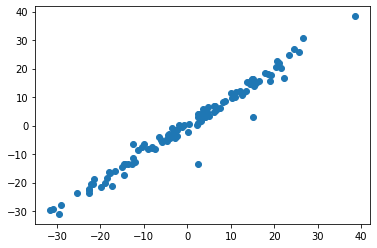

In [44]:
import matplotlib.pyplot as plt
%pylab inline
plt.plot(y_tot['y1'],poly_inter1.predict(xy_tot),'o')

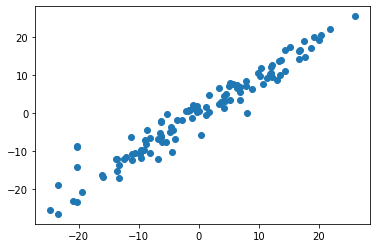

In [45]:
plt.plot(y_tot['y2'],poly_inter2.predict(xy_tot),'o')

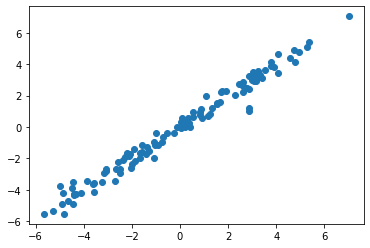

In [46]:
plt.plot(y_tot['y3'],poly_inter3.predict(xy_tot),'o')

In [47]:
poly_inter1.score(xy_tot,y_tot['y1'])

0.9705232644020921

In [48]:
poly_inter2.score(xy_tot,y_tot['y2'])

0.9407882932205576

In [49]:
poly_inter3.score(xy_tot,y_tot['y3'])

0.9790872580655986

**On calcule les valeurs prédites pour les points d'échantillonnage**

In [50]:
outputDesign=np.zeros((np.shape(inputDesign)[0],3))
outputDesign[:,0] = poly_inter1.predict(inputDesign)
outputDesign[:,1] = poly_inter2.predict(inputDesign)
outputDesign[:,2] = poly_inter3.predict(inputDesign)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  "X does not have valid feature names, but"


In [51]:
outputDesign1=ot.Sample(outputDesign)

**On calcule les indices de sensibilité principaux et totaux et les IC associés avec méthode de Martinez pour la première composante**

La cellule 57 n'est utile que sous Collab, sous spyder inputDesign est bien reconnu en entrée de ot.MartinezSensitivityAlgorithm

In [52]:
ot.RandomGenerator.SetSeed(0)
size = 10000
inputDesign = ot.SobolIndicesExperiment(distribution, size, False).generate()

In [53]:
sensitivityAnalysis = ot.MartinezSensitivityAlgorithm(inputDesign, outputDesign1.getMarginal([0]), size)
first_indice = sensitivityAnalysis.getFirstOrderIndices()
total_indice = sensitivityAnalysis.getTotalOrderIndices()
first_indiceIC = sensitivityAnalysis.getFirstOrderIndicesInterval()
total_indiceIC = sensitivityAnalysis.getTotalOrderIndicesInterval()


In [54]:
print(first_indice)
print(total_indice)
print(first_indiceIC)
print(total_indiceIC)

[0.022531,-0.014248,-0.0140205,-0.0133593,-0.0112318,0.473554,-0.00514327,0.053375,-0.00422653,0.0730302,0.261011]#11
[0.0447973,0.0156877,0.00125672,0.00597272,0.00910463,0.491434,0.0130709,0.0731795,0.0187353,0.102983,0.282423]#11
[-0.000233452, 0.0461605]
[-0.0367245, 0.00939048]
[-0.0367918, 0.00911211]
[-0.035165, 0.00948617]
[-0.0339717, 0.0121772]
[0.458676, 0.486185]
[-0.0286338, 0.0180825]
[0.0299223, 0.0753763]
[-0.0279425, 0.0196564]
[0.0484278, 0.0971254]
[0.239584, 0.281736]
[0.0128929, 0.075024]
[-0.0159514, 0.0452715]
[-0.0298046, 0.0304058]
[-0.0251899, 0.0352313]
[-0.0223945, 0.0387036]
[0.450296, 0.53096]
[-0.018276, 0.0426964]
[0.0395589, 0.103404]
[-0.0126653, 0.048192]
[0.0692628, 0.134671]
[0.243399, 0.31973]


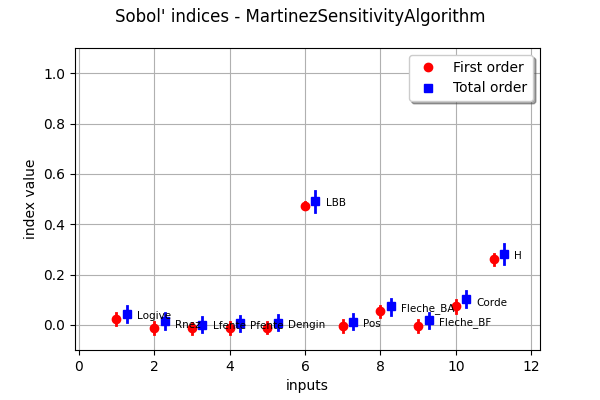

In [55]:
sensitivityAnalysis.draw()

Analyse par composante

In [56]:
for j in range(1,3):
    sensitivityAnalysisb = ot.MartinezSensitivityAlgorithm(inputDesign, outputDesign1.getMarginal([j]), size)
    bb = sensitivityAnalysisb.getFirstOrderIndices()
    tt = sensitivityAnalysisb.getTotalOrderIndices()
    first_indice=np.vstack((first_indice,bb))
    total_indice=np.vstack((total_indice,tt))


Tracés

In [57]:
variables = ["Logive", "Rnez", "Lfente", "Pfente", "Dengin", "LBB", "Pos","Fleche_BA", "Fleche_BF", "Corde", "H"]
xxx = np.arange(len(variables))  # the label locations
width = 0.2  # the width of the bars


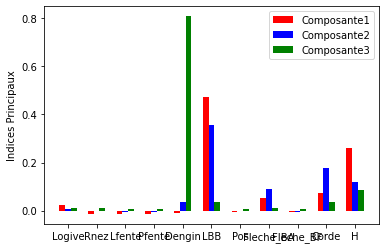

In [58]:
fig, ax = plt.subplots()
rects1 = ax.bar(xxx - width, first_indice[0,:], width, color='red',label='Composante1')
rects2 = ax.bar(xxx , first_indice[1,:], width, color='blue',label='Composante2')
rects3 = ax.bar(xxx + width, first_indice[2,:], width, color='green',label='Composante3')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Indices Principaux')
ax.set_xticks(xxx)
ax.set_xticklabels(variables)
ax.legend()

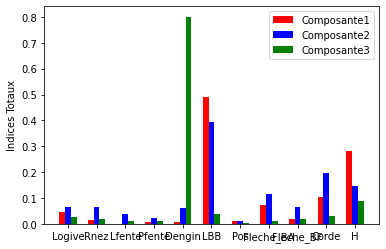

In [59]:
fig, ax = plt.subplots()
rects1 = ax.bar(xxx - width, total_indice[0,:], width, color='red',label='Composante1')
rects2 = ax.bar(xxx , total_indice[1,:], width, color='blue',label='Composante2')
rects3 = ax.bar(xxx + width, total_indice[2,:], width, color='green',label='Composante3')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Indices Totaux')
ax.set_xticks(xxx)
ax.set_xticklabels(variables)
ax.legend()

**Analyse globale des 3 composantes**

In [60]:
sensitivity_algorithm = ot.MartinezSensitivityAlgorithm(inputDesign, outputDesign1, size)

In [61]:
first_indiceag = sensitivity_algorithm.getAggregatedFirstOrderIndices()
total_indiceag = sensitivity_algorithm.getAggregatedTotalOrderIndices()
print(first_indiceag)
print(total_indiceag)

[0.0151212,-0.00854355,-0.0104087,-0.0103765,0.0269986,0.416756,-0.00412585,0.0667961,-0.0041967,0.112802,0.200923]#11
[0.052845,0.0354414,0.0161217,0.0124949,0.0498801,0.44153,0.0121907,0.088794,0.0367803,0.138965,0.223261]#11


Calcul d'intervalles de confiance par bootstrap

In [62]:
nr_bootstrap = 100
confidence_level = 0.95

sensitivity_algorithm.setBootstrapSize(nr_bootstrap)
sensitivity_algorithm.setConfidenceLevel(confidence_level)
sensitivity_algorithm.setUseAsymptoticDistribution(False)
interval_fo = sensitivity_algorithm.getFirstOrderIndicesInterval()
interval_to = sensitivity_algorithm.getTotalOrderIndicesInterval()
print("bootstrap intervals")
print("Aggregated first order indices interval = ", interval_fo)
print("Aggregated total order indices interval = ", interval_to)

bootstrap intervals
Aggregated first order indices interval =  [-0.0012562, 0.0343153]
[-0.0260659, 0.0112166]
[-0.0273675, 0.00961852]
[-0.028188, 0.0105824]
[0.00922727, 0.0477072]
[0.404945, 0.432543]
[-0.0216457, 0.0160362]
[0.0478843, 0.0877946]
[-0.0213294, 0.0159221]
[0.0940227, 0.132184]
[0.185767, 0.217862]
Aggregated total order indices interval =  [0.0297017, 0.0734331]
[0.0122131, 0.0561221]
[-0.00589868, 0.0357769]
[-0.00965522, 0.0323454]
[0.0263733, 0.0708627]
[0.408552, 0.470644]
[-0.010046, 0.0320897]
[0.0646034, 0.109828]
[0.0136064, 0.0576918]
[0.115469, 0.161093]
[0.198225, 0.24455]


Plot

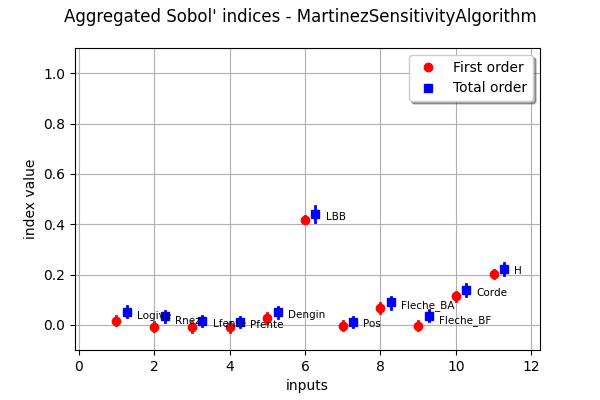

In [63]:
graph = sensitivity_algorithm.draw()
graph